In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import sklearn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import neighbors, datasets, metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier

In [57]:
# leitura do dataset
df = pd.read_csv('../dataset/pima-indians-diabetes.csv', header = None)

# definindo os nomes das colunas
df.columns = ['numero_vezes_gravida', 'concentracao_glicose', 'pressao_diastolica', 'esp_dobra_cutanea', 'insulina', 'imc', 'hist_familiar_diabetes', 'idade', 'classificacao']

In [58]:
# analisando a estrutura do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   numero_vezes_gravida    768 non-null    int64  
 1   concentracao_glicose    768 non-null    int64  
 2   pressao_diastolica      768 non-null    int64  
 3   esp_dobra_cutanea       768 non-null    int64  
 4   insulina                768 non-null    int64  
 5   imc                     768 non-null    float64
 6   hist_familiar_diabetes  768 non-null    float64
 7   idade                   768 non-null    int64  
 8   classificacao           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
# analisando os dados do DataFrame
df.describe()

,numero_vezes_gravida,concentracao_glicose,pressao_diastolica,esp_dobra_cutanea,insulina,imc,hist_familiar_diabetes,idade,classificacao
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
# definindo os dados de entrada e saida
entradas = df[['numero_vezes_gravida', 'concentracao_glicose', 'pressao_diastolica', 'esp_dobra_cutanea', 'insulina', 'imc', 'hist_familiar_diabetes', 'idade']]
saida = df[['classificacao']]

In [61]:
# normalização dos dados
normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas=normaliza.fit_transform(entradas)

In [62]:
# seprando os dados de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, test_size=0.30,random_state=42)

In [63]:
# dicionario para guardar a acuracia de cada modelo
resultado = {}

## KNN

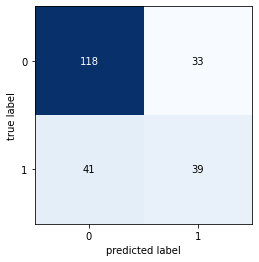

Acuracia do Modelo:  0.6796536796536796


In [64]:
# criando o objeto de classificação
clf_KNN = KNeighborsClassifier(n_neighbors=5)

# treinamento o modelo
clf_KNN.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_KNN.predict(x_test)

# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

# guarda o resultado no dicionário
resultado['clfKNN'] = accuracy_score(y_test, y_pred)

## Arvore de Decisão

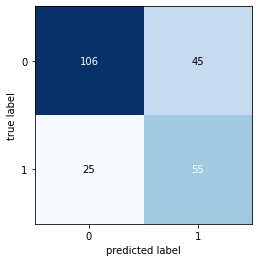

Acuracia do Modelo:  0.696969696969697


In [65]:
# criando o objeto de classificação
clf_arvore = DecisionTreeClassifier(random_state = 1)

# treinamento o modelo
clf_arvore.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_arvore.predict(x_test)

# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

# guarda o resultado no dicionário
resultado['clfarvore'] = accuracy_score(y_test, y_pred)

## Rede MLP

/home/guilherme/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


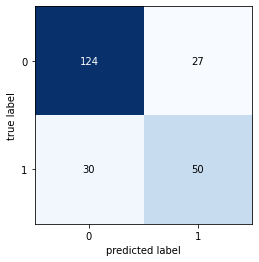

Acuracia do Modelo:  0.7532467532467533
1


In [85]:
# criando o objeto de classificação
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,10), random_state=1)

# treinamento o modelo
clf_mlp.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_mlp.predict(x_test)

# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

# guarda o resultado no dicionário
resultado['clfmlp'] = accuracy_score(y_test, y_pred)

dados_entrada = np.array([10,139,80,0,0,27.1,1.441,57]).reshape(1, -1)
print(clf_mlp.predict(dados_entrada)[0])

In [67]:
# Verificando o Algoritmo com a melhor desempenho
melhor_modelo = max(resultado, key=resultado.get)
print(f'O melhor modelo foi {max(resultado, key=resultado.get)} com acuracia de {resultado[max(resultado, key=resultado.get)]}')

O melhor modelo foi clfmlp com acuracia de 0.7532467532467533


In [91]:
# Salvando o melhor modelo
nome_arquivo = 'modelo_diabetes.sav'
joblib.dump(clf_mlp, nome_arquivo)

['modelo_diabetes.sav']

In [104]:
# Teste com o modelo salvo
dados_entrada = np.array([1,12,72,0,0,0.6,0.,20]).reshape(1, -1)
modelo = joblib.load("modelo_diabetes.sav")
print('Resultado: ', modelo.predict(dados_entrada)[0])

Resultado:  0
